In [49]:
import tensorflow as tf
from src.dataset import stft_dataset, NUHI_PATH
from src.audio import to_mfccs_dataset

train_stft_ds, val_stft_ds, label_names, input_shape = stft_dataset(NUHI_PATH, 0.2, 4)

Found 130 files belonging to 2 classes.
Using 104 files for training.
Using 26 files for validation.
label names: ['noqueen' 'queen']
(TensorSpec(shape=(None, 4000, None), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))
Example audio shape: (4, 4000)
Example label shape: (4,)
513 44100 16
Label: noqueen
Waveform shape: (4000,)
MFCCs shape: (12, 16)
Spectrogram shape: (118, 129, 1)
513 44100 16
Label: queen
Waveform shape: (4000,)
MFCCs shape: (12, 16)
Spectrogram shape: (118, 129, 1)

 ==== STFT input shape ==== 
(118, 129, 1)

Before balancing
Queen: 57% (59), Noqueen: 43% (45)
After balancing
Queen: 50% (45), Noqueen: 50% (45)


Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.5381 - loss: 0.6913 - val_accuracy: 0.5000 - val_loss: 0.6806
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.5204 - loss: 0.6764 - val_accuracy: 0.5000 - val_loss: 0.6695
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.5717 - loss: 0.6635 - val_accuracy: 0.5000 - val_loss: 0.6551
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.5550 - loss: 0.6460 - val_accuracy: 0.5222 - val_loss: 0.6382
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.5124 - loss: 0.6400 - val_accuracy: 0.6556 - val_loss: 0.6184
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.6004 - loss: 0.6167 - val_accuracy: 0.6000 - val_loss: 0.5960
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.6700 - loss: 0.5985 - val_accuracy: 0.6778 - val_loss: 0.5716
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.5547 - loss: 0.5764 - val_accuracy: 0.5889 - val_loss: 0.5550


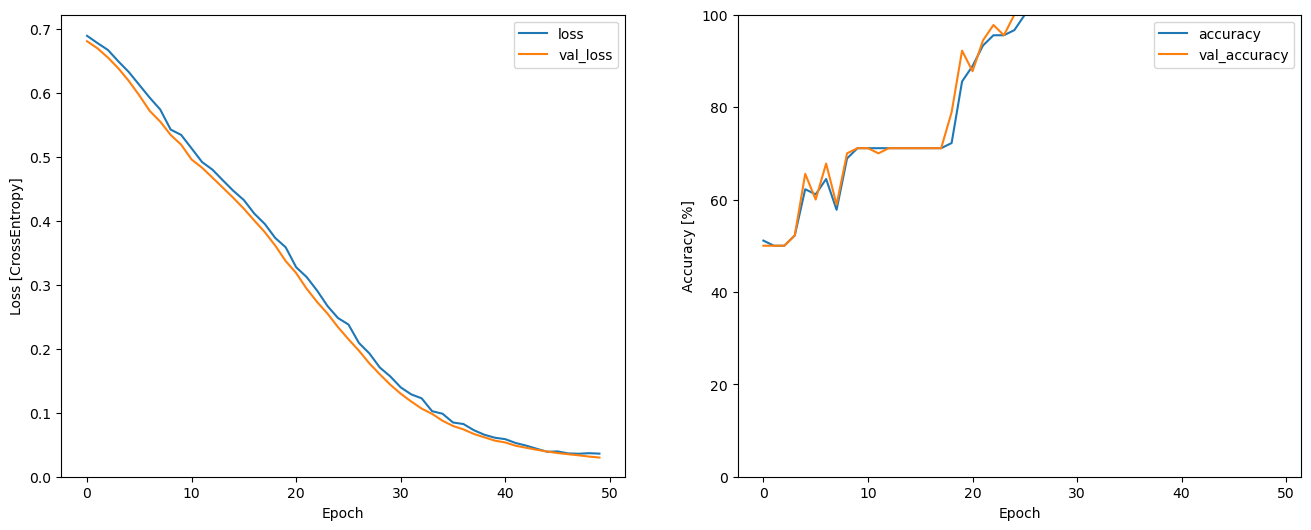

In [50]:
from src.model import get_conv_model, callbacks
from src.plots import plot_history

LEARNING_RATE = 0.0001

model = get_conv_model(input_shape, len(label_names))
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)
history = model.fit(
    train_stft_ds,
    validation_data=train_stft_ds,
    epochs=50,
    # callbacks=callbacks
)
plot_history(history)

In [51]:
def history_to_summary(prefix: str, history):
    print(f"{prefix}:    Loss: {history.history['loss'][-1]:.2f}, Acc: {history.history['accuracy'][-1]:.2f}, Val. Loss: {history.history['val_loss'][-1]:.2f}, Val. Acc: {history.history['val_accuracy'][-1]:.2f}" )

history_to_summary("OSBH + MFCCs + Conv mini model       ", history)
model.save('models/nuhive_stft_conv.keras')

OSBH + MFCCs + Conv mini model       :    Loss: 0.04, Acc: 1.00, Val. Loss: 0.03, Val. Acc: 1.00
